In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
data=pd.read_csv("data.csv")

In [18]:
data.drop(["id","Unnamed: 32"],axis=1,inplace=True)
data.tail()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564         M        21.56         22.39          142.00     1479.0   
565         M        20.13         28.25          131.20     1261.0   
566         M        16.60         28.08          108.30      858.1   
567         M        20.60         29.33          140.10     1265.0   
568         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
564         0.1726  ...        25.450          26.40           166.10   
565         0.1752  ...        23.690          38.25           155.00   
566         0.1590  ...        18.980          34.12           126.70   
567         0.2397  ...        25.740          39.42           184.60   
568         0.1587  ...         9.456          30.37            59.16   

     area_worst  smoothness_worst  compactness_worst  concavity_worst  \
564      2027.0           0.14100            0.21130           0.4107   
565      1731.0           0.11660            0.19220           0.3215   
566      1124.0           0.11390            0.30940           0.3403   
567      1821.0           0.16500            0.86810           0.9387   
568       268.6           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 31 columns]

In [19]:
M=data[data.diagnosis=="M"]
data.info()

B=data[data.diagnosis=="B"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

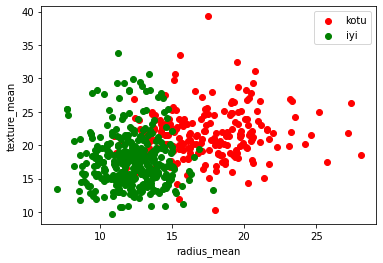

In [20]:
plt.scatter(M.radius_mean,M.texture_mean,color="red", label="kotu")
plt.scatter(B.radius_mean,B.texture_mean,color="green", label="iyi")
plt.xlabel("radius_mean")
plt.ylabel("texture_mean")
plt.legend()
plt.show()

In [21]:
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]
y = data.diagnosis.values
x_data = data.drop(["diagnosis"],axis=1)

In [22]:
x = (x_data - np.min(x_data))/(np.max(x_data)-np.min(x_data))

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3,random_state=1)

In [24]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)

GaussianNB()

In [28]:
from sklearn.naive_bayes import MultinomialNB
nb2=MultinomialNB()
nb2.fit(x_train,y_train)

MultinomialNB()

In [29]:
from sklearn.naive_bayes import BernoulliNB
nb3=BernoulliNB()
nb3.fit(x_train,y_train)

BernoulliNB()

score:  0.935672514619883
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       108
           1       0.91      0.92      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



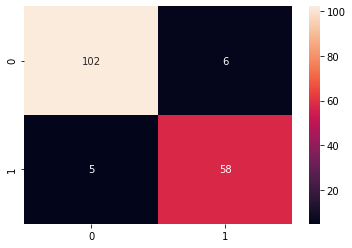

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print("score: ",nb.score(x_test,y_test))
prediction = nb.predict(x_test)
cm = confusion_matrix(y_test,prediction)
print(classification_report(y_test, prediction))
sns.heatmap(cm,annot=True,fmt="d") 

score:  0.8304093567251462
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       108
           1       1.00      0.54      0.70        63

    accuracy                           0.83       171
   macro avg       0.89      0.77      0.79       171
weighted avg       0.87      0.83      0.82       171



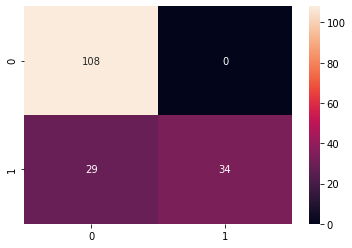

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
print("score: ",nb2.score(x_test,y_test))
prediction2 = nb2.predict(x_test)
cm = confusion_matrix(y_test,prediction2)
print(classification_report(y_test, prediction2))
sns.heatmap(cm,annot=True,fmt="d") 

score:  0.6374269005847953
              precision    recall  f1-score   support

           0       0.64      0.99      0.78       108
           1       0.67      0.03      0.06        63

    accuracy                           0.64       171
   macro avg       0.65      0.51      0.42       171
weighted avg       0.65      0.64      0.51       171



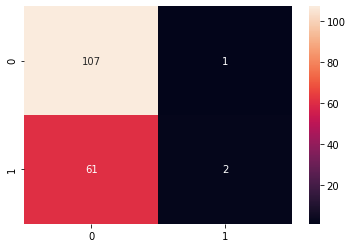

In [34]:
from sklearn.metrics import classification_report, confusion_matrix
print("score: ",nb3.score(x_test,y_test))
prediction3 = nb3.predict(x_test)
cm = confusion_matrix(y_test,prediction3)
print(classification_report(y_test, prediction3))
sns.heatmap(cm,annot=True,fmt="d") 